# <b> Support Vector Machines (SVMs) </b>
___

<b> Table of Content: </b>
<br> <b> [Pipeline_1](#8071) </b>
<br> [1.0 Basic Model: SVM](#80710)
<br> [1.1 Oversampling (SMOTE)](#80711)
<br> [1.2 Cross Validation (Oversampling)](#80712)
<br> [1.3 Model Tuning (Hyperparameters)](#80713)
<br> [1.4 Feature Importance](#80714)
<br> <b> [Pipeline 2](#8072) </b>
<br> [2.0 Basic Model: SVM](#80720)
<br> [2.1 Oversampling (SMOTE)](#80721)
<br> [2.2 Cross Validation (Oversampling)](#80722)
<br> [2.3 Model Tuning (Hyperparameters)](#80723)
<br> [2.4 Feature Importance](#80724)
<br> <b> [Pipeline 3](#8073) </b>
<br> [3.0 Basic Model: SVM](#80730)
<br> [3.1 Oversampling (SMOTE)](#80731)
<br> [3.2 Cross Validation (Oversampling)](#80732)
<br> [3.3 Model Tuning (Hyperparameters)](#80733)
<br> [3.4 Feature Importance](#80734)
<br> <b> [Results](#8074) </b>

Loading Modules and Datasets

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics

# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Import the `svm` model from `sklearn`
from sklearn import svm

# import necessary packages  
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# Cross Validation packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import oversampling and undersampling packages
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# import module (to test execution time of a codeblock to run)
import time

# import warnings to be able to ignore warnings in codeblocks
import warnings

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [2]:
# packages for Receiver Operating Characteristic (ROC) with cross validation
# source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_roc_crossval.html
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

Automatically created module for IPython interactive environment


<a id = "8071"> <h2> Pipeline 1 </h2> </a>
___

In [3]:
# read csv file to a pandas dataframe
df_pipeline1 = pd.read_csv("pipeline_1.csv")

> Show all features and target in dataframe

In [4]:
# show all columns in dataset
print('There are', len(df_pipeline1.columns)-1, 'features, and the target `Revenue` for pipeline 1:')
list(df_pipeline1.columns)

There are 22 features, and the target `Revenue` for pipeline 1:


['Q4',
 'VisitorType_New_Visitor',
 'Q3',
 'TrafficType_2',
 'TrafficType_8',
 'TrafficType_3',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'TrafficType_13',
 'ExitRates_iqr_yj_zscore',
 'OperatingSystems_3',
 'Administrative_Duration_iqr_yj_zscore',
 'TrafficType_1',
 'SpecialDay_0.8',
 'Month_Feb',
 'Browser_6',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

<a id = "80710"> <h2> 1.0 Basic Model: SVM </h2> </a>

<b> Declare Features and Target

In [5]:
# Define Features and Target variables
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [6]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

In [7]:
# set the start time
start = time.time()

# Create the SVC model by calling `svm.SVC()`
# the SVC model has a series of hyper-parameters
# for now, we are going to use the basics of the hyperparameters as follows
# set `gamma` to 0.001 - `gamma` typically ranges from [0.001, 0.01]
# set `C` to 100. , and then set `kernel` to 'linear'
# name the model as `svc_model`
svc_model = svm.SVC(probability=True)

# Fit the data to the SVC model
# since this is supervised learning, you need to `fit` both `X_train` and `y_train` to it
svc_model.fit(X_train, y_train)

# Predict the label of `X_test` using `.predict()`
y_pred = svc_model.predict(X_test)

# Print the classification report using comparison of `y_test` and `y_pred`
print(classification_report(y_test, y_pred))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.68      0.59      0.63       568

    accuracy                           0.89      3699
   macro avg       0.80      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699

--- Execution time: ---
--- 8893.617ms. --- 
--- 8.893617153167725 seconds ---
--- 0.14822695255279542 minutes ---


<b> ROC Curve with AUC score

In [8]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=svc_model):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

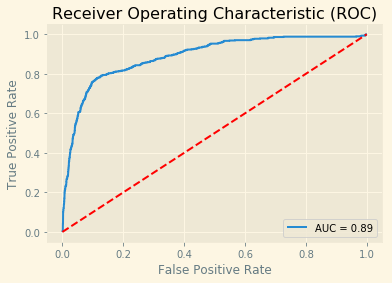

AUC score: 0.8892107435414145


In [9]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model)

<a id = "80711"> <h2> 1.1 Oversampling (SMOTE) </h2> </a>

We oversample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [10]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 22)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [11]:
svc_model1 = svm.SVC(probability=True)

# Fit the data to the SVC model
# since this is supervised learning, you need to `fit` both `X_train_res` and `y_train_res` to it
svc_model1.fit(X_train_res, y_train_res)

# Predict the label of `X_test` using `.predict()`
y_pred = svc_model1.predict(X_test)

# Print the classification report using comparison of `y_test` and `y_pred`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3131
           1       0.51      0.80      0.62       568

    accuracy                           0.85      3699
   macro avg       0.73      0.83      0.76      3699
weighted avg       0.89      0.85      0.86      3699



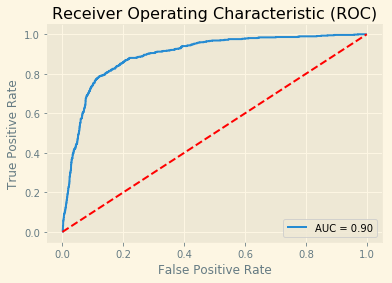

AUC score: 0.8956673609205537


In [12]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model1)

<a id = "80712"> <h2> 1.2 Cross Validation (Oversampling) </h2> </a>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [13]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(svc_model1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.84098698 0.87178786 0.86215568 0.86697859 0.85177155 0.86419549
 0.86690293 0.8669861  0.84978088 0.86486719] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8606 



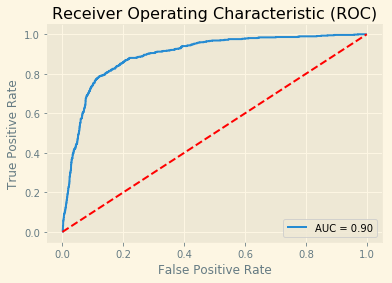

AUC score: 0.8956673609205537


In [14]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model1)

<a id = "80713"> <h2> 1.3 Model Tuning (Hyperparameters) </h2> </a>
To see the hyper-parameters of the SVM model, please refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

<b> Define Grid

In [15]:
# Set the hyper-parameter grid
# source: https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29
C = [0.1, 1, 10, 100]
#kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
kernel=['linear']
#degree=[1, 2, 3]
gamma=[1,0.1,0.01,0.001]
#shrinking=[True, False]
#probability=[True, False]

param_grid = dict(C=C, 
                  gamma=gamma, 
                  kernel=kernel)   
                  #degree=degree, 
                  #shrinking=shrinking, 
                  #probability=probability)

<b> Hyper-parameter tweaking on oversampled training set

In [16]:
from sklearn.model_selection import GridSearchCV
# set the start time
start = time.time()

# define the model
svc_model = svm.SVC()

# Create a grid search object
# source: https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29
grid = GridSearchCV(svc_model, param_grid=param_grid, cv = 3)
#grid = GridSearchCV(svc_model, param_grid=param_grid, refit=True,verbose=2, cv=3, n_jobs=-1)
# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_C = grid.best_estimator_.get_params()['C']
optimal_gamma = grid.best_estimator_.get_params()['gamma']
optimal_kernel = grid.best_estimator_.get_params()['kernel']
#optimal_degree = grid.best_estimator_.get_params()['degree']
#optimal_shrinking = grid.best_estimator_.get_params()['shrinking']
#optimal_probability = grid.best_estimator_.get_params()['probability']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.851255 using {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
--- Execution time: ---
--- 2590793.936ms. --- 
--- 2590.7939364910126 seconds ---
--- 43.179898941516875 minutes ---


<b>----------------------- TEST 1 Gridsearch -----------------------
<br> Optimal parameters for C, gamma, kernel with tested grid: </b>
<br> Best: 0.907833 using {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
<br> --- Execution time: ---
<br> --- 28549844.831ms. --- 
<br> --- 28549.844831228256 seconds ---
<br> --- 475.8307471871376 minutes ---
<br> <b> Grid used:  
* C = [0.1, 1, 10, 100]
* kernel=['rbf', 'poly', 'sigmoid']
* gamma=[1,0.1,0.01,0.001]
    
-> average weighted F1 score was around 0.91 and the average auc with kfold was around 0.95 

<b> Applying the optimal hyper-parameters on oversampled training set

In [17]:
# apply the optimal hyper-parameters to the Logistic Regression Model
svc_model3 = svm.SVC(C=optimal_C, 
                     kernel=optimal_kernel,
                     #degree=optimal_degree,
                     gamma=optimal_gamma)
                     #shrinking=optimal_shrinking,
                     #probability=optimal_probability,
                     #random_state=optimal_random_state)

# fit/train the model with oversampled training set
svc_model3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=svc_model3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3131
           1       0.55      0.78      0.64       568

    accuracy                           0.87      3699
   macro avg       0.75      0.83      0.78      3699
weighted avg       0.89      0.87      0.88      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [18]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(svc_model3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(svc_model3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.83749433 0.85844828 0.8544025  0.86350839 0.83297079 0.85299126
 0.85083035 0.85920586 0.84134076 0.85921743] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.851 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.8998361  0.91924167 0.91312178 0.91735366 0.90743784 0.91408577
 0.90648762 0.91942428 0.90770128 0.91189598] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9117 



<b> Cross validation on X and Y

In [19]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8782 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8851 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.8894


<a id = "80714"> <h2> 1.4 Feature Importance </h2> </a>

Feature importance is only easily possible with a linear kernel, that is why we did gridsearch again with a linear kernel.
<br> Although providing a lower average weighted f1 score and auc score.

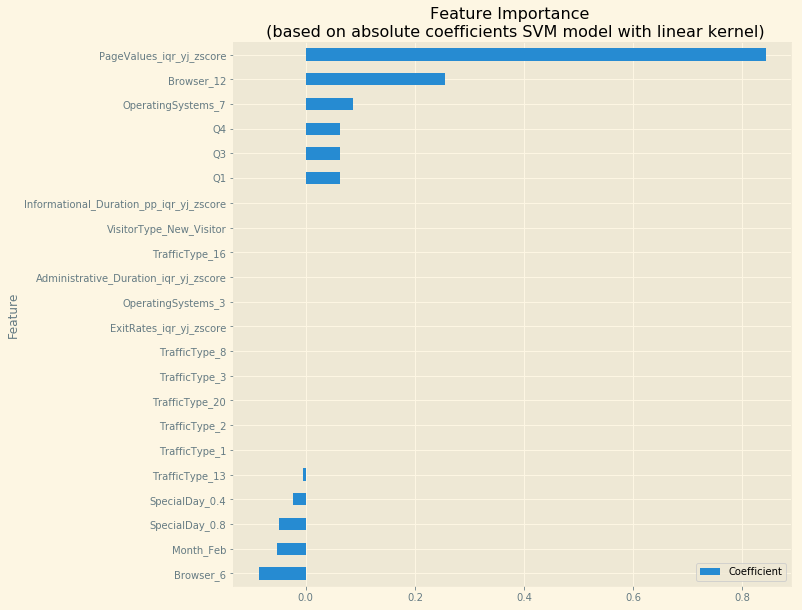

In [20]:
lst_coef=[]
lst_features=[]

for i in svc_model3.coef_:
    for j in i:
        lst_coef.append(j)
        
for j in list(X.columns):
        lst_features.append(j)

# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Coefficient": lst_coef}
df_coef = pd.DataFrame(dict_lists)
# sort descending and reset index
df_coef.sort_values(by=['Coefficient'],  ascending=True, inplace=True)
df_coef.reset_index(inplace=True, drop=True)
df_coef
df_coef.plot(x="Feature", y="Coefficient", kind='barh', figsize=(10,10), title='Feature Importance \n (based on absolute coefficients SVM model with linear kernel)')

<a id = "8072"> <h2> Pipeline 2 </h2> </a>
___

In [21]:
# read csv file to a pandas dataframe
df_pipeline2 = pd.read_csv("pipeline_2.csv")

> Show all features and target in dataframe

In [22]:
# show all columns in dataset
print('There are', len(df_pipeline2.columns)-1, 'features, and the target `Revenue` for pipeline 2:')
list(df_pipeline2.columns)

There are 21 features, and the target `Revenue` for pipeline 2:


['TrafficType_15',
 'Month_Nov',
 'Administrative_Duration_mm_yj_stdev',
 'VisitorType_New_Visitor',
 'Informational_mm_yj_stdev',
 'TrafficType_2',
 'TrafficType_3',
 'ProductRelated_mm_yj_stdev',
 'PageValues_mm_yj_stdev',
 'Month_May',
 'TrafficType_13',
 'OperatingSystems_3',
 'TrafficType_1',
 'add_exit_bounce_rates_mm_yj_stdev',
 'Month_Mar',
 'TrafficType_18',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'TrafficType_12',
 'Browser_12',
 'Revenue']

<a id = "80720"> <h2> 2.0 Basic Model: SVM </h2> </a>

<b> Declare Features and Target

In [23]:
# Define Features and Target variables
X = df_pipeline2.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline2.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [24]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

In [25]:
# set the start time
start = time.time()

# Create the SVC model by calling `svm.SVC()`
# the SVC model has a series of hyper-parameters
# for now, we are going to use the basics of the hyperparameters as follows
# set `gamma` to 0.001 - `gamma` typically ranges from [0.001, 0.01]
# set `C` to 100. , and then set `kernel` to 'linear'
# name the model as `svc_model`
svc_model = svm.SVC(probability=True)

# Fit the data to the SVC model
# since this is supervised learning, you need to `fit` both `X_train` and `y_train` to it
svc_model.fit(X_train, y_train)

# Predict the label of `X_test` using `.predict()`
y_pred = svc_model.predict(X_test)

# Print the classification report using comparison of `y_test` and `y_pred`
print(classification_report(y_test, y_pred))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3131
           1       0.00      0.00      0.00       568

    accuracy                           0.85      3699
   macro avg       0.42      0.50      0.46      3699
weighted avg       0.72      0.85      0.78      3699

--- Execution time: ---
--- 10083.262ms. --- 
--- 10.083261728286743 seconds ---
--- 0.1680543621381124 minutes ---


/opt/tljh/user/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<b> ROC Curve with AUC score

In [26]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=svc_model):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

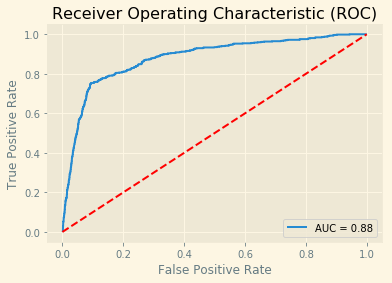

AUC score: 0.8793089099914082


In [27]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model)

<a id = "80721"> <h2> 2.1 Oversampling (SMOTE) </h2> </a>

We oversample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [28]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 21)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [29]:
svc_model1 = svm.SVC(probability=True)

# Fit the data to the SVC model
# since this is supervised learning, you need to `fit` both `X_train_res` and `y_train_res` to it
svc_model1.fit(X_train_res, y_train_res)

# Predict the label of `X_test` using `.predict()`
y_pred = svc_model1.predict(X_test)

# Print the classification report using comparison of `y_test` and `y_pred`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74      3131
           1       0.26      0.75      0.38       568

    accuracy                           0.63      3699
   macro avg       0.59      0.68      0.56      3699
weighted avg       0.83      0.63      0.68      3699



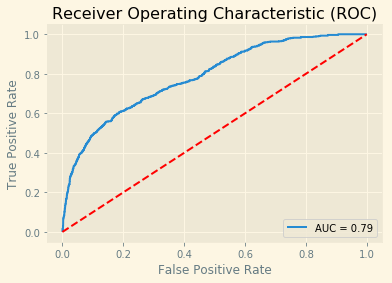

AUC score: 0.78569990688301


In [30]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model1)

<a id = "80722"> <h2> 2.2 Cross Validation (Oversampling) </h2> </a>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [31]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(svc_model1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(svc_model3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.70786872 0.70267593 0.70206381 0.70752626 0.70634102 0.68528308
 0.70206807 0.69719923 0.69629109 0.68884026] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.6996 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.74329653 0.75367365 0.74541768 0.73340668 0.75798471 0.7338104
 0.74859595 0.73740748 0.7512387  0.74438883] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.7449 



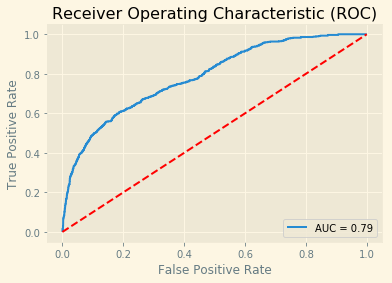

AUC score: 0.78569990688301


In [32]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model1)

<a id = "80723"> <h2> 2.3 Model Tuning (Hyperparameters) </h2> </a>
To see the hyper-parameters of the SVM model, please refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

<b> Define Grid

In [33]:
# Set the hyper-parameter grid
# source: https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29
C = [0.1, 1, 10, 100]
#kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
kernel=['linear']
#degree=[1, 2, 3]
gamma=[1,0.1,0.01,0.001]
#shrinking=[True, False]
#probability=[True, False]

param_grid = dict(C=C, 
                  gamma=gamma, 
                  kernel=kernel)   
                  #degree=degree, 
                  #shrinking=shrinking, 
                  #probability=probability)

<b> Hyper-parameter tweaking on oversampled training set

In [34]:
from sklearn.model_selection import GridSearchCV
# set the start time
start = time.time()

# define the model
svc_model = svm.SVC()

# Create a grid search object
# source: https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29
grid = GridSearchCV(svc_model, param_grid=param_grid, cv = 3)
#grid = GridSearchCV(svc_model, param_grid=param_grid, refit=True,verbose=2, cv=3, n_jobs=-1)
# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_C = grid.best_estimator_.get_params()['C']
optimal_gamma = grid.best_estimator_.get_params()['gamma']
optimal_kernel = grid.best_estimator_.get_params()['kernel']
#optimal_degree = grid.best_estimator_.get_params()['degree']
#optimal_shrinking = grid.best_estimator_.get_params()['shrinking']
#optimal_probability = grid.best_estimator_.get_params()['probability']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.857222 using {'C': 100, 'gamma': 1, 'kernel': 'linear'}
--- Execution time: ---
--- 188941.225ms. --- 
--- 188.94122529029846 seconds ---
--- 3.149020421504974 minutes ---


<b> Applying the optimal hyper-parameters on oversampled training set

In [35]:
# apply the optimal hyper-parameters to the Logistic Regression Model
svc_model3 = svm.SVC(C=optimal_C, 
                     kernel=optimal_kernel,
                     gamma=optimal_gamma)


# fit/train the model with oversampled training set
svc_model3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=svc_model3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3131
           1       0.57      0.75      0.65       568

    accuracy                           0.87      3699
   macro avg       0.76      0.82      0.79      3699
weighted avg       0.89      0.87      0.88      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [36]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(svc_model3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(svc_model3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.85734616 0.86107199 0.85974184 0.87168328 0.84173547 0.85915018
 0.84720072 0.86181097 0.84814162 0.85763797] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8566 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.92221796 0.94261587 0.92888573 0.93542395 0.93212836 0.92686621
 0.93660318 0.93273753 0.92501576 0.9288725 ] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9311 



<b> Cross validation on X and Y

In [37]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8873 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8902 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.8956


<a id = "80724"> <h2> 2.4 Feature Importance </h2> </a>

Feature importance is only easily possible with a linear kernel, that is why we did gridsearch again with a linear kernel.
<br> Although providing a lower average weighted f1 score and auc score.

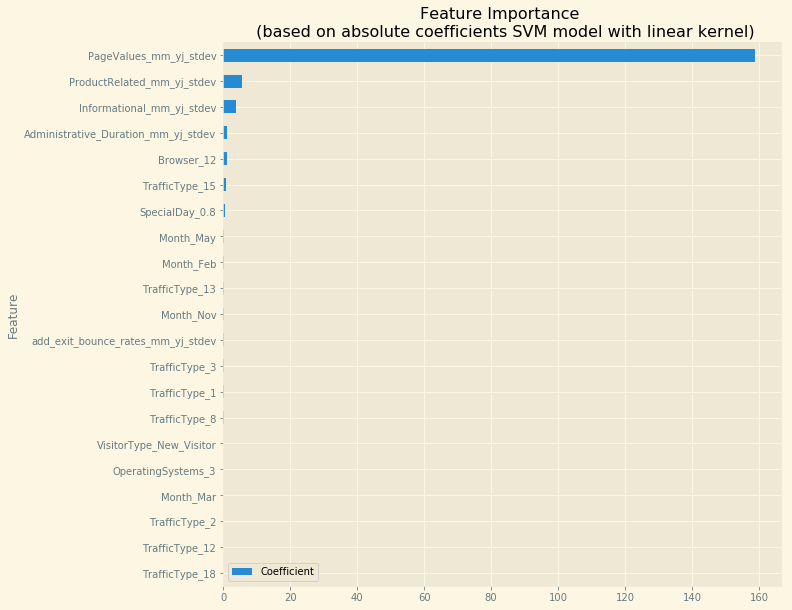

In [38]:
lst_coef=[]
lst_features=[]

for i in svc_model3.coef_:
    for j in i:
        lst_coef.append(abs(j))
        
for j in list(X.columns):
        lst_features.append(j)

# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Coefficient": lst_coef}
df_coef = pd.DataFrame(dict_lists)
# sort descending and reset index
df_coef.sort_values(by=['Coefficient'],  ascending=True, inplace=True)
df_coef.reset_index(inplace=True, drop=True)
df_coef
df_coef.plot(x="Feature", y="Coefficient", kind='barh', figsize=(10,10), title='Feature Importance \n (based on absolute coefficients SVM model with linear kernel)')

<a id = "8073"> <h2> Pipeline 3 </h2> </a>
___

In [39]:
# read csv file to a pandas dataframe
df_pipeline3 = pd.read_csv("pipeline_3.csv")

> Show all features and target in dataframe

In [40]:
# show all columns in dataset
print('There are', len(df_pipeline3.columns)-1, 'features, and the target `Revenue` for pipeline 3:')
list(df_pipeline3.columns)

There are 23 features, and the target `Revenue` for pipeline 3:


['Administrative_yj_stdev_zscore',
 'Month_Nov',
 'VisitorType_New_Visitor',
 'TrafficType_2',
 'Month_May',
 'TrafficType_3',
 'add_exit_bounce_rates_yj_stdev_zscore',
 'TrafficType_13',
 'PageValues_yj_stdev_zscore',
 'OperatingSystems_3',
 'TrafficType_1',
 'Month_Mar',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'Month_Dec',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Month_Oct',
 'Region_1',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

<a id = "80730"> <h2> 3.0 Basic Model: SVM </h2> </a>

<b> Declare Features and Target

In [41]:
# Define Features and Target variables
X = df_pipeline3.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline3.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

In [42]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

In [43]:
# set the start time
start = time.time()

# Create the SVC model by calling `svm.SVC()`
# the SVC model has a series of hyper-parameters
# for now, we are going to use the basics of the hyperparameters as follows
# set `gamma` to 0.001 - `gamma` typically ranges from [0.001, 0.01]
# set `C` to 100. , and then set `kernel` to 'linear'
# name the model as `svc_model`
svc_model = svm.SVC(probability=True)

# Fit the data to the SVC model
# since this is supervised learning, you need to `fit` both `X_train` and `y_train` to it
svc_model.fit(X_train, y_train)

# Predict the label of `X_test` using `.predict()`
y_pred = svc_model.predict(X_test)

# Print the classification report using comparison of `y_test` and `y_pred`
print(classification_report(y_test, y_pred))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.67      0.59      0.63       568

    accuracy                           0.89      3699
   macro avg       0.80      0.77      0.78      3699
weighted avg       0.89      0.89      0.89      3699

--- Execution time: ---
--- 8221.604ms. --- 
--- 8.221604347229004 seconds ---
--- 0.1370267391204834 minutes ---


<b> ROC Curve with AUC score

In [44]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=svc_model):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

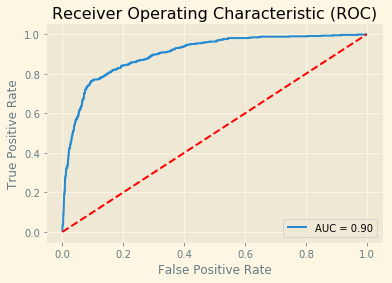

AUC score: 0.9022417802888876


In [45]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model)

<a id = "80731"> <h2> 3.1 Oversampling (SMOTE) </h2> </a>

We oversample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [46]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 23)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The SMOTE Algorithm has oversampled the instances in the minority class and made it equal to majority class:
* Both classes (0 & 1) now have 7291 instances, the dataset is balanced.
* Class 1 increased from 1340 instances to 7291 instances, an increase of 5951 instances of class 1.

In [47]:
svc_model1 = svm.SVC(probability=True)

# Fit the data to the SVC model
# since this is supervised learning, you need to `fit` both `X_train_res` and `y_train_res` to it
svc_model1.fit(X_train_res, y_train_res)

# Predict the label of `X_test` using `.predict()`
y_pred = svc_model1.predict(X_test)

# Print the classification report using comparison of `y_test` and `y_pred`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3131
           1       0.48      0.84      0.61       568

    accuracy                           0.84      3699
   macro avg       0.72      0.84      0.75      3699
weighted avg       0.89      0.84      0.85      3699



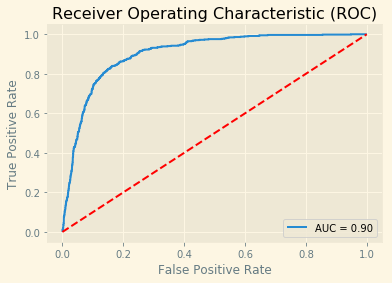

AUC score: 0.9039090017588765


In [48]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model1)

<a id = "80732"> <h2> 3.2 Cross Validation (Oversampling) </h2> </a>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

In [49]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(svc_model1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.85794677 0.87105497 0.86897367 0.87844389 0.85729584 0.86610415
 0.86211638 0.86547566 0.85991988 0.86481835] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8652 



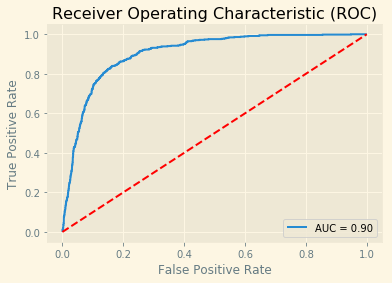

AUC score: 0.9039090017588765


In [50]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=svc_model1)

<a id = "80733"> <h2> 3.3 Model Tuning (Hyperparameters) </h2> </a>
To see the hyper-parameters of the SVM model, please refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

<b> Define Grid

In [51]:
# Set the hyper-parameter grid
# source: https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29
C = [0.1, 1, 10, 100]
#kernel=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
kernel=['linear']
#degree=[1, 2, 3]
gamma=[1,0.1,0.01,0.001]
#shrinking=[True, False]
#probability=[True, False]

param_grid = dict(C=C, 
                  gamma=gamma, 
                  kernel=kernel)   
                  #degree=degree, 
                  #shrinking=shrinking, 
                  #probability=probability)

<b> Hyper-parameter tweaking on oversampled training set

In [52]:
from sklearn.model_selection import GridSearchCV
# set the start time
start = time.time()

# define the model
svc_model = svm.SVC()

# Create a grid search object
# source: https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29
grid = GridSearchCV(svc_model, param_grid=param_grid, cv = 3)
#grid = GridSearchCV(svc_model, param_grid=param_grid, refit=True,verbose=2, cv=3, n_jobs=-1)
# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_C = grid.best_estimator_.get_params()['C']
optimal_gamma = grid.best_estimator_.get_params()['gamma']
optimal_kernel = grid.best_estimator_.get_params()['kernel']
#optimal_degree = grid.best_estimator_.get_params()['degree']
#optimal_shrinking = grid.best_estimator_.get_params()['shrinking']
#optimal_probability = grid.best_estimator_.get_params()['probability']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.851255 using {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
--- Execution time: ---
--- 1452027.496ms. --- 
--- 1452.027496099472 seconds ---
--- 24.200458268324535 minutes ---


<b> Applying the optimal hyper-parameters on oversampled training set

In [53]:
# apply the optimal hyper-parameters to the Logistic Regression Model
svc_model3 = svm.SVC(C=optimal_C, 
                     kernel=optimal_kernel,
                     gamma=optimal_gamma)


# fit/train the model with oversampled training set
svc_model3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=svc_model3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3131
           1       0.55      0.78      0.64       568

    accuracy                           0.87      3699
   macro avg       0.75      0.83      0.78      3699
weighted avg       0.89      0.87      0.88      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [54]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
#result = cross_val_score(gnb, X, Y, cv=kfold, scoring='accuracy')
# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(svc_model3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(svc_model3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.83749433 0.85844828 0.8544025  0.86350839 0.83297079 0.85299126
 0.85013295 0.85920586 0.84134076 0.85921743] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.851 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.9125476  0.93589994 0.92519539 0.93154125 0.91833758 0.9250278
 0.930827   0.93013348 0.91820739 0.92530671] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9253 



<b> Cross validation on X and Y

In [55]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result_accuracy = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(svc_model3, X, Y, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('Average of all the accuracy results:')
print('--------------------------------------------------------------------------')
print(round(result_accuracy.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print(round(result_auc.mean(), 4))

--------------------------------------------------------------------------
Average of all the accuracy results:
--------------------------------------------------------------------------
0.8798 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8864 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
0.9001


<a id = "80734"> <h2> 3.4 Feature Importance </h2> </a>

Feature importance is only easily possible with a linear kernel, that is why we did gridsearch again with a linear kernel.
<br> Although providing a lower average weighted f1 score and auc score.

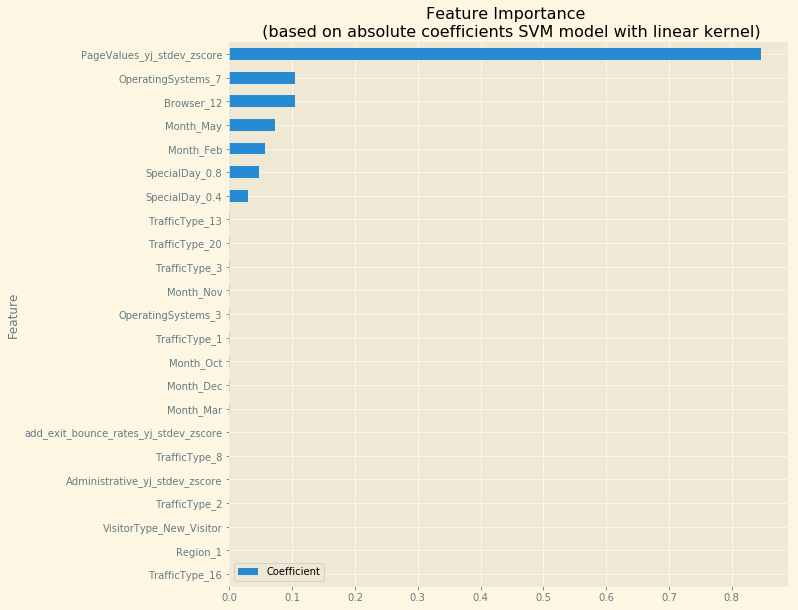

In [56]:
lst_coef=[]
lst_features=[]

for i in svc_model3.coef_:
    for j in i:
        lst_coef.append(abs(j))
        
for j in list(X.columns):
        lst_features.append(j)

# combine the 2 lists of class 0 and feature names into a dataframe
dict_lists = {"Feature": lst_features, "Coefficient": lst_coef}
df_coef = pd.DataFrame(dict_lists)
# sort descending and reset index
df_coef.sort_values(by=['Coefficient'],  ascending=True, inplace=True)
df_coef.reset_index(inplace=True, drop=True)
df_coef
df_coef.plot(x="Feature", y="Coefficient", kind='barh', figsize=(10,10), title='Feature Importance \n (based on absolute coefficients SVM model with linear kernel)')

<a id = "8074"> <h2> Results </h2> </a>

_Note:_ To be able to interpret the coefficients for <b> 'feature importance' </b> in the SVM model, a _linear_ kernel was chosen. 
<br> However a more optimal SVM model can be derived, but will remain a black box for feature importance with non-linear kernels. 
<br> An example was provided for 'pipeline 1' with a more optimal non-linear model in the first part of this notebook, using GridSearch to derive more optimal hyper-parameters for the SVM model.

<b> Left align all markdown tables

In [57]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

### Pipeline 1 Results </b>
_Note:_ tool used for Excel table to markdown conversion, namely: https://tableconvert.com/

| **Model**                                                         | **weighted avg F1-score** | **AUC score** |
| ----------------------------------------------------------------- |:-------------------------:|:-------------:|
| Basic Model                                                       | 0\.89                     | 0\.889        |
| Oversampled Model \(SMOTE\)                                       | 0\.86                     | 0\.896        |
| Cross validation Oversampled Model                                | 0\.86                     | 0\.896        |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.85                     | 0\.912        |

### Pipeline 2 Results </b>

| **Model**                                                         | **weighted avg F1-score** | **AUC score** |
| ----------------------------------------------------------------- |:-------------------------:|:-------------:|
| Basic Model                                                       | 0\.78                     | 0\.879        |
| Oversampled Model \(SMOTE\)                                       | 0\.68                     | 0\.786        |
| Cross validation Oversampled Model                                | 0\.70                     | 0\.786        |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.86                     | 0\.931        |


### Pipeline 3 Results </b>

| **Model**                                                         | **weighted avg F1-score** | **AUC score** |
| ----------------------------------------------------------------- |:-------------------------:|:-------------:|
| Basic Model                                                       | 0\.89                     | 0\.902        |
| Oversampled Model \(SMOTE\)                                       | 0\.85                     | 0\.904        |
| Cross validation Oversampled Model                                | 0\.87                     | 0\.904        |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. and Oversampling\) | 0\.85                     | 0\.925        |


<b> Conclusion: </b> 
<br> Pipelines have very similar results for the best model with cross validation using oversampling (SMOTE) and the 'optimal' parameters for the linear model, based on the weighted avg F1-score and AUC score.
<br> The highest average scores are with pipeline 2, having a weighted avg F1-score of 0.86 and a AUC score of 0.931.
<br> The variation in the feature: <b> 'Pagevalues' </b>, is by far the most important feature in predicting the variation in the target variable 'Revenue', for all three pipelines, by looking at the magnitude of the coefficients. 